In [41]:
from sklearn.datasets import make_classification
import numpy as np 

X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=92,hypercube=False,class_sep=10)

import matplotlib.pyplot as plt

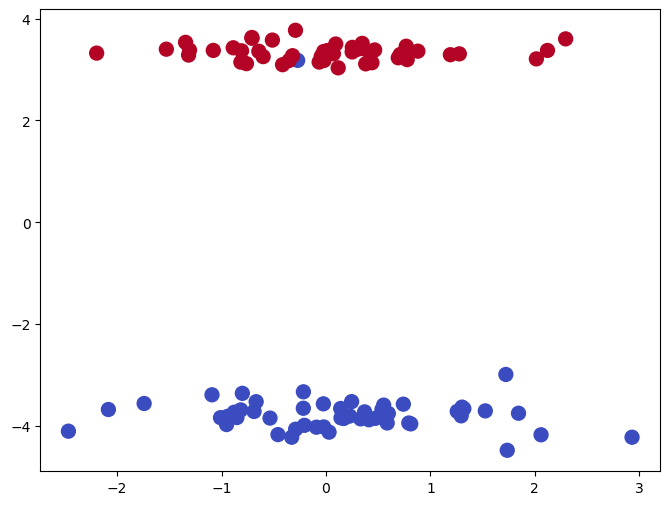

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',s=100)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None,solver='sag')
model.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [44]:
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[0.40949776 1.80441137]]
Model intercept: [-1.99950158]


In [45]:
m1=-(model.coef_[0][0]/model.coef_[0][1])
b1=model.intercept_[0]/model.coef_[0][1]

x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

In [46]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [47]:
def gd(X,y):
    
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.9
    
    for i in range(1000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:], weights[0]
    

In [48]:
coef_, intercept = gd(X,y)
print("Gradient descent coefficients:", coef_)
print("Gradient descent intercept:", intercept)

Gradient descent coefficients: [0.39978046 1.68487134]
Gradient descent intercept: -1.5938988566378725


In [49]:
m=-(coef_[0]/coef_[1])
b=intercept/coef_[1]

x_input_gd=np.linspace(-3,3,100)
y_input_gd=m*x_input_gd+b

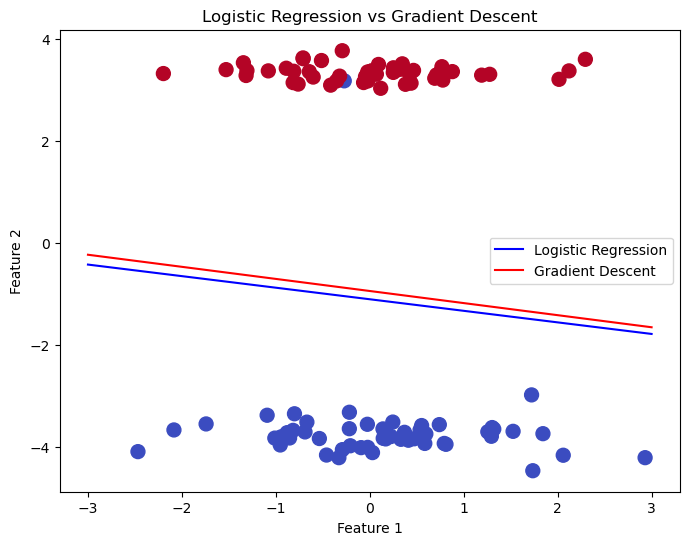

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(x_input,y_input,color='blue',label='Logistic Regression')
plt.plot(x_input_gd,y_input_gd,color='red',label='Gradient Descent')
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression vs Gradient Descent')
plt.legend()
plt.show()